<h6>In tis project the objective is to define the marketing strategy adoptded considering client type</h6>

<h5>Import libraries</h5>

In [209]:
# Data manipulation and analysis
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.formula.api as smf


<h5>Data Collection</h5>
<h6>Obtain the tabular data (.csv) from file.</h6>

<h5>Read Data</h5>

In [210]:
df = pd.read_csv("../data/campaign-data.csv")
df

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0,0,0,0,0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0,0,0,0,322500,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0,0,0,0,0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0,3547500,1290000,0,0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0,0,0,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,ID-987463,Small Facility,800,20,1003,16-08-2015,0,0,0.0,0.0,0.0,0,0,0,0,0,Low
2972,ID-987463,Small Facility,800,20,1003,16-09-2015,0,0,0.0,0.0,0.0,0,0,0,0,0,High
2973,ID-987463,Small Facility,800,20,1003,16-10-2015,0,0,0.0,0.0,0.0,0,0,2580000,0,0,High
2974,ID-987463,Small Facility,800,20,1003,16-11-2015,0,0,0.0,0.0,0.0,0,0,0,0,0,High


<h5>Feature Engineering</h5>
<h6>The feature engineering step adds two new features ('Calendar_month' and 'Calendar_year') based on the 'Calendardate' column to help in the analysis.</h6>

In [211]:
class FeatureEngineering:
    # A class to perform feature engineering on the input data.
    def fit(self, X, y=None):
        return self
    
    def fit_transform(self, X):
        # Location Features
        X["Calendardate"] = pd.to_datetime(X["Calendardate"])
        X["Calendar_month"] =  X["Calendardate"].dt.month
        X["Calendar_year"] = X["Calendardate"].dt.year

        return pd.DataFrame(X)

df = FeatureEngineering().fit_transform(df)

print(df.columns, df.columns)
print(df.shape, df.shape)
df.head()

Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition',
       'Calendar_month', 'Calendar_year'],
      dtype='object') Index(['Client ID', 'Client Type', 'Number of Customers', 'Montly Target',
       'Zip Code', 'Calendardate', 'Amount Collected', 'Unit Sold',
       'Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)',
       'Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3',
       'Sales Contact 4', 'Sales Contact 5', 'Number of Competition',
       'Calendar_month', 'Calendar_year'],
      dtype='object')
(2976, 19) (2976, 19)


,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition,Calendar_month,Calendar_year
0,ID-987275,Medium Facility,2800,125,1003,2014-01-16,0,0,0.0,0.0,0.0,0,0,0,0,0,Low,1,2014
1,ID-987275,Medium Facility,2800,125,1003,2014-02-16,3409460,24,0.0,0.0,0.0,0,0,0,0,322500,Low,2,2014
2,ID-987275,Medium Facility,2800,125,1003,2014-03-18,10228384,75,0.0,0.0,0.0,0,0,0,0,0,Low,3,2014
3,ID-987275,Medium Facility,2800,125,1003,2014-04-18,17047304,123,0.0,0.0,0.0,0,3547500,1290000,0,0,Low,4,2014
4,ID-987275,Medium Facility,2800,125,1003,2014-05-19,23866224,171,0.0,0.0,0.0,0,0,0,0,0,Low,5,2014


<h5>Data Cleaning</h5>
<h6>Preprocess the data to handle missing values, outliers, duplicates, and inconsistencies. This ensures that the data is accurate and ready for analysis.</h6></p>

In [212]:
df = df.convert_dtypes(convert_integer=False) # The regression model not accept Int64Dtype()
df = df.drop(columns=["Zip Code"])

# Changing the name's columns
df.columns=[mystring.replace(" ", "_") for mystring in df.columns]
df.columns=[mystring.replace("(", "") for mystring in df.columns]
df.columns=[mystring.replace(")", "") for mystring in df.columns]

# Changing the type's columns
df["Campaign_Email"] = df["Campaign_Email"].astype(int)
df["Campaign_Flyer"] = df["Campaign_Flyer"].astype(int)
df["Campaign_Phone"] = df["Campaign_Phone"].astype(int)
df["Sales_Contact_1"] = df["Sales_Contact_1"].astype(int)
df["Sales_Contact_2"] = df["Sales_Contact_2"].astype(int)
df["Sales_Contact_3"] = df["Sales_Contact_3"].astype(int)
df["Sales_Contact_4"] = df["Sales_Contact_4"].astype(int)
df["Sales_Contact_5"] = df["Sales_Contact_5"].astype(int)

# Analyze the missing values and duplicates in the DataFrame
def analyze_missing_and_duplicates(data: pd.DataFrame) -> pd.DataFrame:
    n = data.shape[0]
    ret = pd.DataFrame(data.isnull().sum(), columns=["missing_number"])
    ret["percentage_missing_number"] = (ret["missing_number"] / n) * 100
    ret["types"] = data.dtypes
    ret["duplicate"] = data.duplicated(keep=False).sum()
    ret["NAN"] = data.isna().sum()
    return pd.DataFrame(ret)


analyze_missing_and_duplicates(df)

,missing_number,percentage_missing_number,types,duplicate,NAN
Client_ID,0,0.0,string,0,0
Client_Type,0,0.0,string,0,0
Number_of_Customers,0,0.0,int64,0,0
Montly_Target,0,0.0,int64,0,0
Calendardate,0,0.0,datetime64[ns],0,0
Amount_Collected,0,0.0,int64,0,0
Unit_Sold,0,0.0,int64,0,0
Campaign_Email,0,0.0,int64,0,0
Campaign_Flyer,0,0.0,int64,0,0
Campaign_Phone,0,0.0,int64,0,0


<h5>Exploratory Data Analysis (EDA)</h5>
<h6>Perform initial exploration of the data to understand its structure, distribution, and relationships. This involves generating summary statistics, visualizations (e.g., histograms, scatter plots, box plots), and identifying patterns or trends.</h6></p>

In [213]:
print(df.info())
df.describe().T.style.background_gradient(cmap="Oranges").format("{:.2f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Client_ID              2976 non-null   string        
 1   Client_Type            2976 non-null   string        
 2   Number_of_Customers    2976 non-null   int64         
 3   Montly_Target          2976 non-null   int64         
 4   Calendardate           2976 non-null   datetime64[ns]
 5   Amount_Collected       2976 non-null   int64         
 6   Unit_Sold              2976 non-null   int64         
 7   Campaign_Email         2976 non-null   int64         
 8   Campaign_Flyer         2976 non-null   int64         
 9   Campaign_Phone         2976 non-null   int64         
 10  Sales_Contact_1        2976 non-null   int64         
 11  Sales_Contact_2        2976 non-null   int64         
 12  Sales_Contact_3        2976 non-null   int64         
 13  Sal

,count,mean,std,min,25%,50%,75%,max
Number_of_Customers,2976.00,1456.94,1669.85,0.00,240.00,960.00,2090.00,9840.00
Montly_Target,2976.00,75.08,87.04,5.00,10.00,47.50,101.25,510.00
Amount_Collected,2976.00,17004398.89,30258030.14,-22161496.00,0.00,3409460.00,20456764.00,207977104.00
Unit_Sold,2976.00,121.46,216.41,-63.00,0.00,24.00,147.00,1500.00
Campaign_Email,2976.00,143284.93,723045.10,0.00,0.00,0.00,0.00,11446733.00
Campaign_Flyer,2976.00,685418.53,1727587.29,0.00,0.00,0.00,81482.25,13593951.00
Campaign_Phone,2976.00,29777.42,383213.35,0.00,0.00,0.00,0.00,9617380.00
Sales_Contact_1,2976.00,131340.73,1034882.27,0.00,0.00,0.00,0.00,29025000.00
Sales_Contact_2,2976.00,2023319.05,3396991.00,0.00,0.00,645000.00,2580000.00,30637500.00
Sales_Contact_3,2976.00,1867487.40,3271348.58,0.00,0.00,322500.00,2580000.00,26122500.00


<h6>The Heatmap showing the correlation matrix between Amount Collected (target variable) and the details about customers, helping identify which indicators have the strongest correlation with Amount Collected, aiding in feature selection for modeling.</h6>

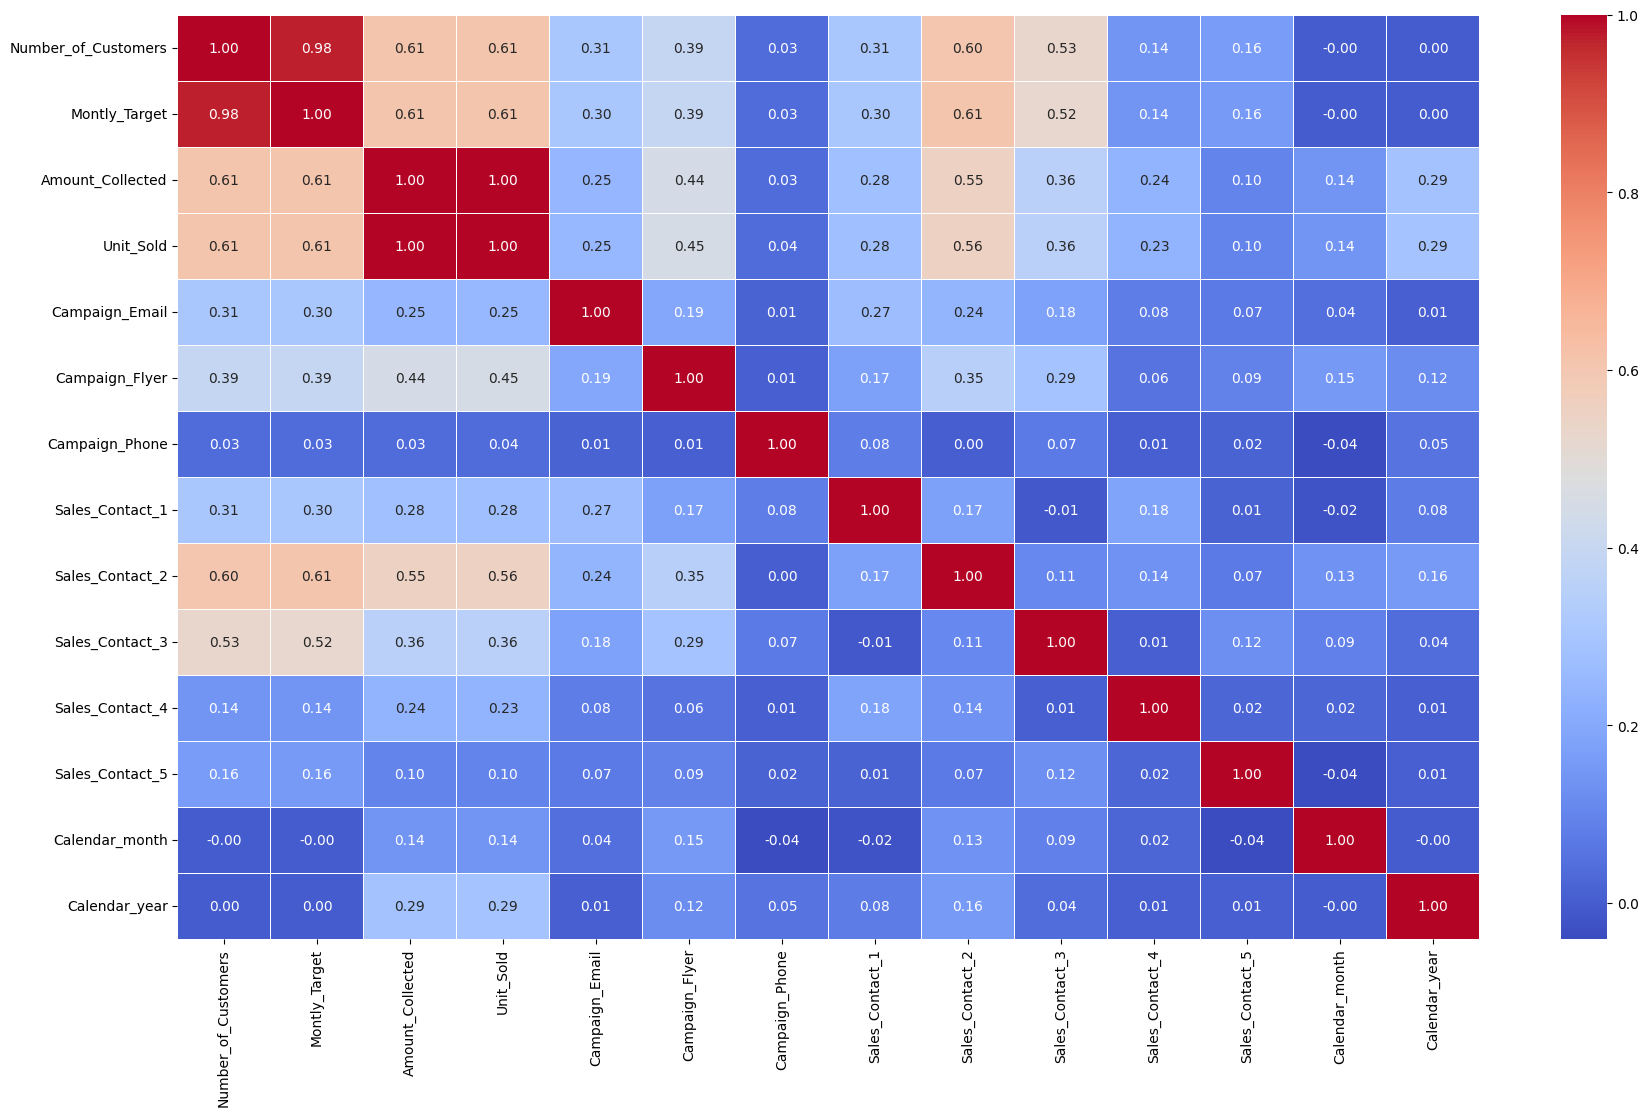

In [214]:
df_corr = df[df.columns].dropna().corr()
plt.figure(figsize=(21, 12))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.savefig("../reports/correlation_matrix.png")
plt.show()

<h6>Created distribution plots for variable to visualize their distributions and identify any outliers or skewness in the data.</h6>

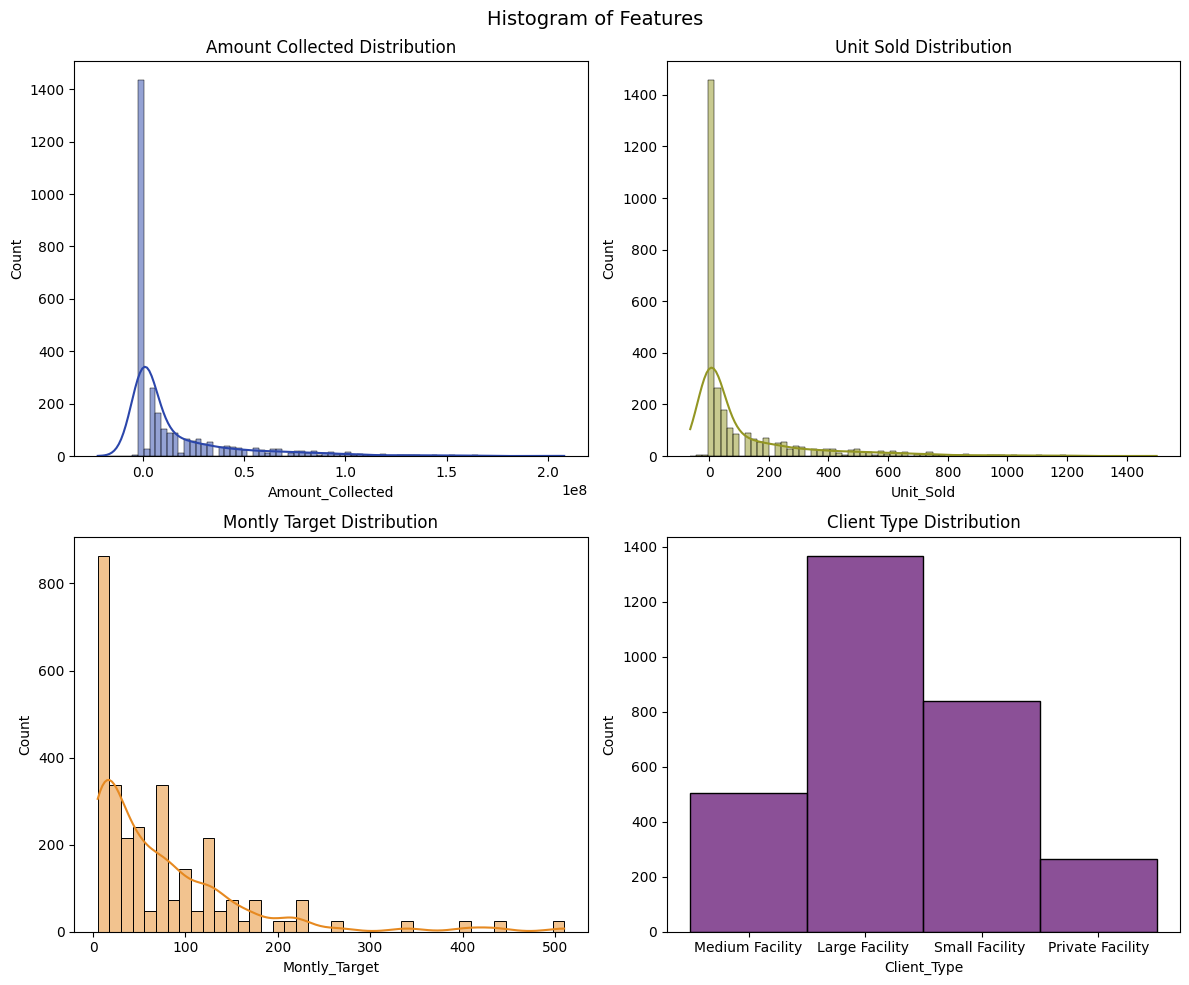

In [215]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

# Distribution plots for each economic indicator
sns.histplot(df["Amount_Collected"], kde=True, ax=axes[0], color="#2b46ab")
axes[0].set_title("Amount Collected Distribution")

sns.histplot(df["Unit_Sold"], kde=True, ax=axes[1], color="#939623")
axes[1].set_title("Unit Sold Distribution")

sns.histplot(df["Montly_Target"], kde=True, ax=axes[2], color="#e68920")
axes[2].set_title("Montly Target Distribution")

sns.histplot(df["Client_Type"], ax=axes[3], color="#641675")
axes[3].set_title("Client Type Distribution")

plt.suptitle("Histogram of Features", fontsize=14)
plt.tight_layout()
plt.savefig("../reports/histogram_features.jpg")
plt.show()

<Figure size 1200x800 with 0 Axes>

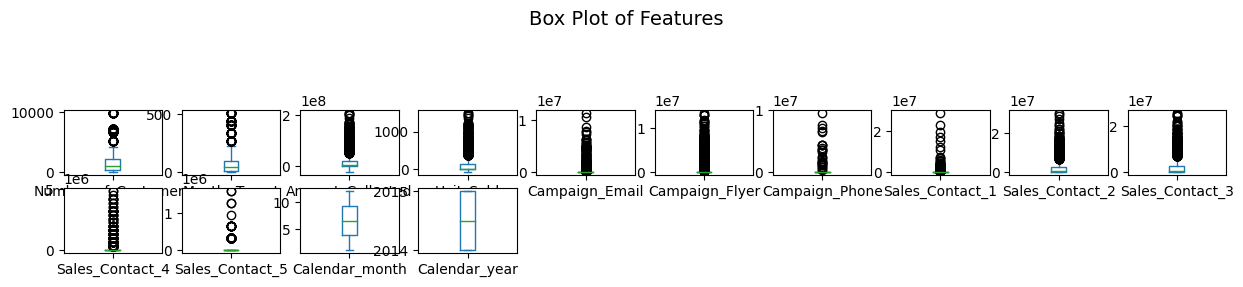

In [216]:
plt.figure(figsize=(12, 8), facecolor="lightgrey")
df.plot(kind="box", layout=(10, 10), subplots=True, sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle("Box Plot of Features", fontsize=14)
plt.show()

<h6>The Client Type's Large Facility and Small Facility are resposible for <b>74%</b> of Client Types.</h6>

In [217]:
df["Client_Type"].value_counts(normalize=True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility     0.08871
Name: Client_Type, dtype: Float64

<h6>Medium Facility Client Type have the biggest Unit Sold with 290.583 and an Amount Collected of 40759967.66</h6>

In [218]:
df.groupby("Client_Type").mean()

,Number_of_Customers,Montly_Target,Amount_Collected,Unit_Sold,Campaign_Email,Campaign_Flyer,Campaign_Phone,Sales_Contact_1,Sales_Contact_2,Sales_Contact_3,Sales_Contact_4,Sales_Contact_5,Calendar_month,Calendar_year
Client_Type,,,,,,,,,,,,,,
Large Facility,1380.842105,71.578947,1.999880e+07,143.098684,142273.576754,8.192056e+05,45595.432749,133667.763158,2.034013e+06,2.017039e+06,119287.280702,16266.447368,6.5,2014.5
Medium Facility,3940.761905,202.857143,4.075997e+07,290.583333,437217.027778,1.552603e+06,49176.847222,398645.833333,4.822783e+06,4.698646e+06,85104.166667,33273.809524,6.5,2014.5
Private Facility,400.727273,20.454545,5.030246e+06,35.784091,5183.708333,2.272918e+05,5522.465909,1221.590909,6.376705e+05,4.434375e+05,3664.772727,12215.909091,6.5,2014.5
Small Facility,422.514286,21.285714,1.637759e+06,11.689286,11975.982143,9.120873e+04,0.000000,8062.500000,7.617143e+05,3.727946e+05,4223.214286,1535.714286,6.5,2014.5


In [219]:
pd.crosstab(df["Number_of_Competition"], df["Client_Type"], margins=True, normalize="columns")

Client_Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number_of_Competition,,,,,
High,0.166667,0.166667,0.166667,0.166667,0.166667
Low,0.833333,0.833333,0.833333,0.833333,0.833333


<h5>Regression Analysis (Market Sales and Strategies)</h5>

<h6>The P>|t| of the 'Campaign_Phone' is <b>high</b>(0.944) so is important eliminate. We would want a p-value less than .05 to be 95% of confident.</h6>

In [220]:
# Define the formula used in the model
formula = "Amount_Collected ~ Campaign_Email + Campaign_Flyer + Campaign_Phone + Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3 + Sales_Contact_4 + Sales_Contact_5"

# Fit the model
model = smf.ols(formula, data=df)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:48:46   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05     

In [221]:
results_html = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]
results_html

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.481000e+06,512000.000,2.891,0.004,477000.000,2490000.000
Campaign_Email,7.932000e-01,0.597,1.329,0.184,-0.377,1.963
Campaign_Flyer,3.337600e+00,0.260,12.831,0.000,2.828,3.848
Campaign_Phone,7.340000e-02,1.053,0.070,0.944,-1.991,2.137
Sales_Contact_1,4.236800e+00,0.415,10.207,0.000,3.423,5.051
Sales_Contact_2,3.638200e+00,0.129,28.155,0.000,3.385,3.892
Sales_Contact_3,2.343200e+00,0.131,17.925,0.000,2.087,2.600
Sales_Contact_4,1.094780e+01,1.060,10.331,0.000,8.870,13.026
Sales_Contact_5,3.507800e+00,4.549,0.771,0.441,-5.412,12.428


<h6>Eliminated the column with a high p-value.</h6>

In [222]:
results_html = results_html.reset_index()
results_html = results_html[results_html["P>|t|"] < 0.05][["index", "coef"]]
results_html

,index,coef
0,Intercept,1.481000e+06
2,Campaign_Flyer,3.337600e+00
4,Sales_Contact_1,4.236800e+00
5,Sales_Contact_2,3.638200e+00
6,Sales_Contact_3,2.343200e+00
7,Sales_Contact_4,1.094780e+01


<h5>Regression Analysis(Market Sales and Strategies) - Broken for different account types</h5>
<h6>Passed by all account types, with a filter that select only the variables that have a p-value less than <b>.05</b>.</br>
Sales_Contact_2 is very important to Small Facility with Coefficient: 8.10</br>
Campaign_Flyer is very important to Medium Facility with Coefficient: 4.10</br>
Sales_Contact_2 is very important to Private Facility with Coefficient: 6.62</br>
Sales_Contact_1 is very important to Large Facility with Coefficient: 11.67</br>
</h6>

In [223]:
consolidated_summary = pd.DataFrame()

for acctype in list(set(list(df["Client_Type"]))):
    temp_data = df[df["Client_Type"] == acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+Campaign_Phone+Sales_Contact_1 + Sales_Contact_2 + Sales_Contact_3+Sales_Contact_4 + Sales_Contact_5', data=temp_data).fit()
    results_html = pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0].reset_index()
    results_html = results_html[results_html["P>|t|"] < 0.05][["index", "coef"]]
    results_html.columns=["Variable", "Coefficent (Impact)"]
    results_html["Account Type"] = acctype
    results_html = results_html.sort_values("Coefficent (Impact)", ascending=False)
    results_html = results_html[results_html["Variable"] != "Intercept"]
    print(acctype)
    consolidated_summary = consolidated_summary.append(results_html)
    print(results_html)
    #print(results.summary())

Medium Facility
          Variable  Coefficent (Impact)     Account Type
2   Campaign_Flyer               4.1059  Medium Facility
5  Sales_Contact_2               3.5778  Medium Facility
4  Sales_Contact_1               3.1365  Medium Facility
6  Sales_Contact_3               2.1174  Medium Facility
Small Facility 
          Variable  Coefficent (Impact)     Account Type
5  Sales_Contact_2         8.101000e-01  Small Facility 
3   Campaign_Phone         8.172000e-07  Small Facility 
Private Facility
          Variable  Coefficent (Impact)      Account Type
5  Sales_Contact_2               6.6223  Private Facility
Large Facility 
          Variable  Coefficent (Impact)     Account Type
4  Sales_Contact_1              11.6731  Large Facility 
7  Sales_Contact_4              10.6145  Large Facility 
5  Sales_Contact_2               4.0031  Large Facility 
2   Campaign_Flyer               2.7204  Large Facility 
6  Sales_Contact_3               2.0316  Large Facility 
3   Campaign_Phone   

<h5>Final Recommendations</h5>

<h6>Using the table below, we can utilize the coefficients to assess the return on investment for each dollar ($) spent. It is evident that different account types exhibit varying effectiveness for different campaigns and sales contacts.<br>

<b>Case Explanation - Medium Facility</b><br>
For instance, the Medium Facility demonstrates satisfactory results with Flyer Campaigns, yielding an average return of $4.10 for every dollar spent. Sales Contact 2 proves to be highly effective, followed by Sales Contact 1 and Sales Contact 3. Conversely, all other strategies show negligible impact and could be discontinued to reduce costs.

For example, the "Campaign_Phone" yields a negative return of -$3.5 for the Large Facility group.
</h6>


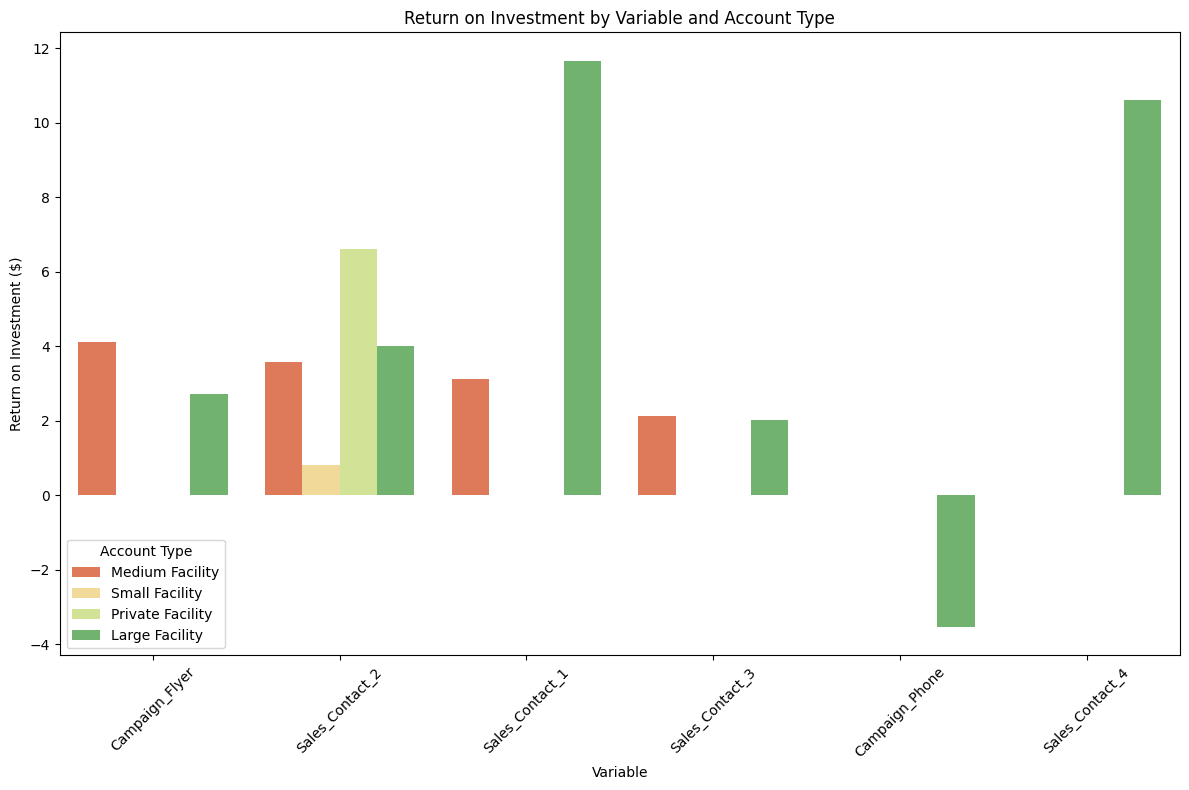

,Variable,Coefficent (Impact),Account Type
2,Campaign_Flyer,4.105900e+00,Medium Facility
5,Sales_Contact_2,3.577800e+00,Medium Facility
4,Sales_Contact_1,3.136500e+00,Medium Facility
6,Sales_Contact_3,2.117400e+00,Medium Facility
5,Sales_Contact_2,8.101000e-01,Small Facility
3,Campaign_Phone,8.172000e-07,Small Facility
5,Sales_Contact_2,6.622300e+00,Private Facility
4,Sales_Contact_1,1.167310e+01,Large Facility
7,Sales_Contact_4,1.061450e+01,Large Facility
5,Sales_Contact_2,4.003100e+00,Large Facility


In [224]:
plt.figure(figsize=(12, 8))
sns.barplot(data=consolidated_summary, x="Variable", y="Coefficent (Impact)", hue="Account Type", palette='RdYlGn')
plt.xlabel("Variable")
plt.ylabel("Return on Investment ($)")
plt.title("Return on Investment by Variable and Account Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig("../reports/return_on_investment.jpg")
plt.show()
consolidated_summary

In [225]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop("index", inplace=True, axis=1)
consolidated_summary.columns = ["Variable", "Return on Investment", "Account Type"]
consolidated_summary.style.background_gradient(cmap="RdYlGn")

def format(x):
        return "${:.1f}".format(x)

consolidated_summary["Return on Investment"] = consolidated_summary["Return on Investment"].apply(format)
pd.DataFrame(consolidated_summary)

,Variable,Return on Investment,Account Type
0,Campaign_Flyer,$4.1,Medium Facility
1,Sales_Contact_2,$3.6,Medium Facility
2,Sales_Contact_1,$3.1,Medium Facility
3,Sales_Contact_3,$2.1,Medium Facility
4,Sales_Contact_2,$0.8,Small Facility
5,Campaign_Phone,$0.0,Small Facility
6,Sales_Contact_2,$6.6,Private Facility
7,Sales_Contact_1,$11.7,Large Facility
8,Sales_Contact_4,$10.6,Large Facility
9,Sales_Contact_2,$4.0,Large Facility
